In [2]:
import pandas as pd
import numpy as np 

# Needleman-Wunsch Algorithm 1

In [30]:
import numpy as np

def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    
    # Initialize the alignment matrix
    n = len(seq1) + 1
    m = len(seq2) + 1
    matrix = np.zeros((m, n), dtype=int)

    # Initialize the first row and column with gap penalties
    for i in range(m):
        matrix[i][0] = i * gap_penalty
    for j in range(n):
        matrix[0][j] = j * gap_penalty

    # Fill in the matrix using the Needleman-Wunsch algorithm
    for i in range(1, m):
        for j in range(1, n):
            match = matrix[i-1][j-1] + (match_score if seq1[j-1] == seq2[i-1] else mismatch_score)
            delete = matrix[i-1][j] + gap_penalty
            insert = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    # Traceback to find the optimal alignment
    align_seq1 = ""
    align_seq2 = ""
    i, j = m - 1, n - 1
    while i > 0 and j > 0:
        score = matrix[i][j]
        score_diag = matrix[i-1][j-1]
        score_up = matrix[i][j-1]
        score_left = matrix[i-1][j]
        if score == score_diag + (match_score if seq1[j-1] == seq2[i-1] else mismatch_score):
            align_seq1 = seq1[j-1] + align_seq1
            align_seq2 = seq2[i-1] + align_seq2
            i -= 1
            j -= 1
        elif score == score_left + gap_penalty:
            align_seq1 = '-' + align_seq1
            align_seq2 = seq2[i-1] + align_seq2
            i -= 1
        elif score == score_up + gap_penalty:
            align_seq1 = seq1[j-1] + align_seq1
            align_seq2 = '-' + align_seq2
            j -= 1

    # Fill in the rest of the alignment if sequences have different lengths
    while i > 0:
        align_seq1 = '-' + align_seq1
        align_seq2 = seq2[i-1] + align_seq2
        i -= 1
    while j > 0:
        align_seq1 = seq1[j-1] + align_seq1
        align_seq2 = '-' + align_seq2
        j -= 1

    return align_seq1, align_seq2, matrix[-1][-1]  # Return the aligned sequences and the alignment score

# Example usage:
seq1 = "SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL"
seq2 = "PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY"
match_score = 2  # Score for a match
mismatch_score = -2  # Penalty for a mismatch
gap_penalty = -2  # Penalty for a gap

aligned_seq1, aligned_seq2, alignment_score = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)

print("Alignment score:", alignment_score)
print("Aligned sequence 1:", aligned_seq1)
print("Aligned sequence 2:", aligned_seq2)





Alignment score: -26
Aligned sequence 1: SALPQPT-TPV-SSFTS-GSMLGRT--DTALTNTYSAL-
Aligned sequence 2: ---PSPTMEAVTSVEASTASHPHSTSSYFA-T-TYYHLY


# Smith Waterman

In [3]:
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Step 1: Initialize the score matrix (first row and column start with 0)
    m, n = len(seq1), len(seq2)
    score_matrix = [[0 for _ in range(n+1)] for _ in range(m+1)]

    # Step 2: Fill the score matrix (include 0 as a possible score)
    max_score = 0
    max_pos = None
    for i in range(1, m+1):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = score_matrix[i-1][j] + gap_penalty
            insert = score_matrix[i][j-1] + gap_penalty
            score_matrix[i][j] = max(0, match, delete, insert)  # Include 0 in the max function
            # Keep track of the maximum score in the matrix
            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_pos = (i, j)

    # Step 3: Trace-back to find the optimal local alignment (start at max score)
    align_seq1, align_seq2 = '', ''
    i, j = max_pos
    while i > 0 and j > 0 and score_matrix[i][j] > 0:
        score_current = score_matrix[i][j]
        score_diagonal = score_matrix[i-1][j-1]
        score_up = score_matrix[i][j-1]
        score_left = score_matrix[i-1][j]
        
        if score_current == score_diagonal + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score):
            align_seq1 += seq1[i-1]
            align_seq2 += seq2[j-1]
            i -= 1
            j -= 1
        elif score_current == score_left + gap_penalty:
            align_seq1 += seq1[i-1]
            align_seq2 += '-'
            i -= 1
        elif score_current == score_up + gap_penalty:
            align_seq1 += '-'
            align_seq2 += seq2[j-1]
            j -= 1
        else:
            break  # This case is reached if score_current is 0

    # Since we traversed the score matrix from the max scoring cell, we need to reverse the alignments
    align_seq1 = align_seq1[::-1]
    align_seq2 = align_seq2[::-1]

    return align_seq1, align_seq2, max_score

# Example usage (uncomment to run):
seq1 = "HEAGAWGHEE"
seq2 = "PAWHEAE"
match_score = 3
mismatch_score = -2
gap_penalty = -1
aligned_seq1, aligned_seq2, max_alignment_score = smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)

print("Aligned Sequences:\n", aligned_seq1, "\n", aligned_seq2)
print("Max Alignment Score:", max_alignment_score)


Aligned Sequences:
 AWGHE-E 
 AW-HEAE
Max Alignment Score: 13


# HMM

In [4]:
import numpy as np

# Define the states and emission probabilities
states = ['Fair', 'Loaded']
state_transition_probs = {
    'Fair': {'Fair': 0.9, 'Loaded': 0.1},
    'Loaded': {'Fair': 0.1, 'Loaded': 0.9}
}
emission_probs = {
    'Fair': [1/6]*6,
    'Loaded': [1/10]*5 + [1/2]
}

# Function to simulate the dishonest casino
def simulate_dishonest_casino(num_rolls):
    # Start in the Fair state
    current_state = 'Fair'
    rolls = []
    states_sequence = []

    for _ in range(num_rolls):
        # Roll the dice based on the emission probabilities of the current state
        roll = np.random.choice([1, 2, 3, 4, 5, 6], p=emission_probs[current_state])
        rolls.append(roll)
        states_sequence.append(current_state)
        
        # Transition to the next state
        current_state = np.random.choice(states, p=list(state_transition_probs[current_state].values()))

    return rolls, states_sequence

# Simulate the casino for 100 rolls
rolls, states_sequence = simulate_dishonest_casino(100)

    
# Create the formatted strings
rolls_str = ''.join(str(roll) for roll in rolls)
states_str = ''.join(f"{state[0]}" for state in states_sequence)

# Combine and return the formatted output
print( f"Rolls: {rolls_str}\nState: {states_str}\n")


# Print the results
#for roll, state in zip(rolls, states_sequence):
    #print(f"Roll: {roll}, State: {state}")





Rolls: 2266661355554544342516466254615655115546664634142346244423341621455131521533126542323665426266656626
State: FFLLLFFFFFFFFFFLFFFFFFFLLLFLLFFLFFFFFFLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLL



In [26]:

# Define the states and probabilities as per the diagram provided by the user
states = ['AT', 'CG']

# Transition probabilities
transition_probabilities = {
    'Start': {'AT': 0.5, 'CG': 0.5},
    'AT': {'AT': 0.9997, 'CG': 0.0003},
    'CG': {'AT': 0.0002, 'CG': 0.9998}
}

# Emission probabilities
emission_probabilities = {
    'AT': {'A': 0.2698, 'T': 0.3297, 'C': 0.2080, 'G': 0.1985},
    'CG': {'A': 0.2459, 'T': 0.2079, 'C': 0.2478, 'G': 0.2984}
}

# Function to generate a DNA sequence using the HMM
def generate_dna_sequence(length):
    import random
    
    # Start the sequence
    current_state = 'Start'
    dna_sequence = ''

    # Generate the sequence
    for _ in range(length):
        if current_state != 'Start':
            dna_sequence += random.choices(
                population=list(emission_probabilities[current_state].keys()),
                weights=list(emission_probabilities[current_state].values())
            )[0]

        # Transition to the next state
        current_state = random.choices(
            population=list(transition_probabilities[current_state].keys()),
            weights=list(transition_probabilities[current_state].values())
        )[0]

    return dna_sequence

# Function to display the sequence in a formatted way
def display_sequence(sequence):
    # Group the sequence into lines of 80 characters each for better readability
    line_length = 80
    for i in range(0, len(sequence), line_length):
        print(sequence[i:i+line_length])

# Generate a DNA sequence of length 2000 bases
dna_sequence = generate_dna_sequence(2001)

f = open("DNA-Sequence", "w")
f.write(dna_sequence)
f.close()

# Display the generated DNA sequence
display_sequence(dna_sequence)

GCTGGTAACGCGACCTACATTCACGTCGCAACACCCACGGCACGGGACACGCACGCCGCGGAATGCAATCCGACTAAGGC
CACGGTAGGTGCTCAGTGACGCTTCTGAACGGCGGATTTCGTAGCATCGGTTGCAATAGGGCGGATGAGCTCGAGCATGT
CCATCTTCGTCAGTGTATGCCACTGAAACGATTCCCTCTAAGGTAGGATCGCGTGGGACAATTGGTTCTAAGTGTCATAT
ATAGGGCTATGGTAGACCGGAGACTTAGTCGGGCCCGTTGCGTCCCATAGGACAGTAGGGGAGCTACTGAGAATGAGCGA
TAAGGGTTGAGTTTACAGAGAGGTTAGGCTGTAGACGGGTTCAGTCGCGACACAGGTGAGAGCGCCACTCCCTAAGCACG
CAGGAGTTTTCGGCTAGAGGATTCAGAGTCAACGGGATTAGAGCGACGTGGGACAATAACGCCTGCACTTAAGACCTTGC
CGAAAAAATGATCACGAAAGGCTTGGAGTAGGTATTAAGCCTATCGTCGTGGGCGAGCCTTGCCGTTTTTTTATTTGGGT
TAAAGATAGGTGGGGGGGAGCCACCGTTACTTTAACATCGGCTAAAGAGCAAGTTGCCCGCAATTGGTATTCGTACCGGT
GAATCCACTGGCAACAGCGACGCTACAACCTCGCCTCCCCCAAAATCTGGGACGACCGGTTTGCGTGTGCAGTTTGGAGG
TCAATACCCACCAAACAGTGGTGAGATAGTGATGATGGTGTTTGCAGACCCGACTTGGGATGTCATGGATTCTAAGAGTA
GAGTGTGAAGGGGCCTATCAAAATGGGGCGGCGGTACGCGTGGACACTCAAAGTTGTACGCCTCCACGCGGCGGTGTGCC
GTAGGAGCGCGGGTGGTGTGAGGGTCGGACCCTGGTCGAAGGATAGGGCGGATATAATGGCGGGACATCAACAGATGGAC
CAAGGCTTAAGGCCCCTCATTTCGTTGT

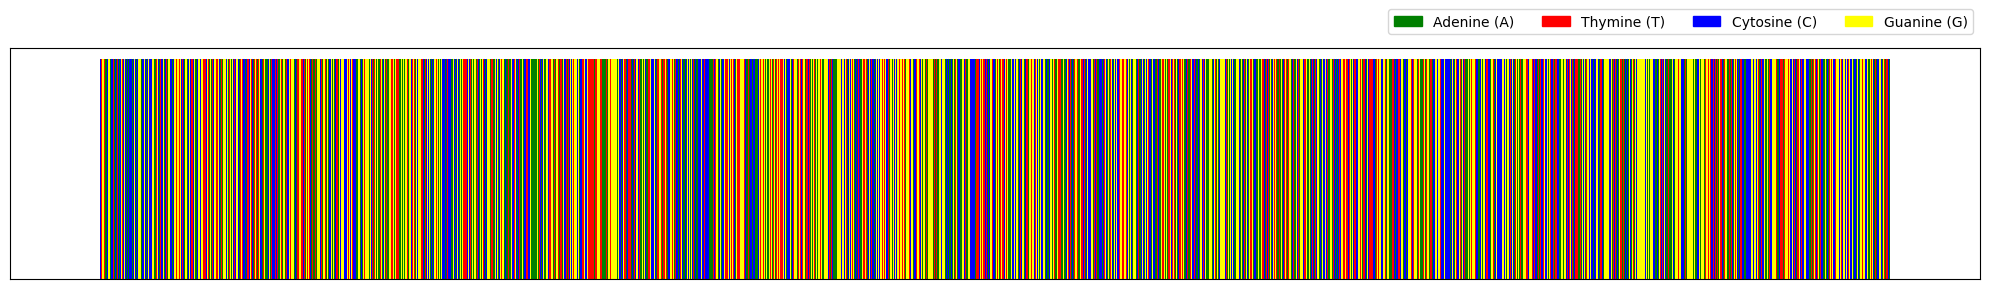

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dna_sequence(sequence):

    # colors for each base
    colors = {'A': 'green', 'T': 'red', 'C': 'blue', 'G': 'yellow'}
    # list of colors for each base in the sequence
    color_sequence = [colors[base] for base in sequence]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 3))
    # Create a bar plot where each base is a bar with the corresponding color
    ax.bar(np.arange(len(sequence)), np.ones(len(sequence)), color=color_sequence, width=1)
    
    # Remove y-axis and ticks
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # Add a legend
    handles = [plt.Rectangle((0,0),1,1, color=colors[base]) for base in 'ATCG']
    labels = ['Adenine (A)', 'Thymine (T)', 'Cytosine (C)', 'Guanine (G)']
    ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1.2), ncol=4)

    # Tight layout to maximize space used for the sequence
    plt.tight_layout()
    
    # Save the plot as a high-resolution PNG image
    #plt.savefig('dna_sequence_plot.png', dpi=300)

    plt.show()

plot_dna_sequence(dna_sequence) # This line would be used to generate the plot


# Viterbi Algorithm

In [20]:
import math

def viterbi_log_space(observed_sequence, states, start_prob, trans_prob, emit_prob):
    #initialize variables in log space
    V = [{}]
    path = {}
    log_zero = float('-inf')  #represents of log(0)

    #initialize the starting probabilities and paths in log space
    for state in states:
        if start_prob[state] > 0:
            V[0][state] = math.log(start_prob[state]) + math.log(emit_prob[state][observed_sequence[0]])
        else:
            V[0][state] = log_zero
        path[state] = [state]

    #run Viterbi for t > 0
    for t in range(1, len(observed_sequence)):
        V.append({})
        newpath = {}

        for current_state in states:
            max_prob = log_zero
            max_state = None
            for prev_state in states:
                if V[t-1][prev_state] != log_zero and trans_prob[prev_state][current_state] > 0:
                    prob = V[t-1][prev_state] + math.log(trans_prob[prev_state][current_state]) + math.log(emit_prob[current_state][observed_sequence[t]])
                    if prob > max_prob or max_state is None:
                        max_prob = prob
                        max_state = prev_state

            V[t][current_state] = max_prob
            newpath[current_state] = path[max_state] + [current_state]

        path = newpath

    #find the final most probable state and its probability
    max_prob = log_zero
    max_state = None
    for state, prob in V[-1].items():
        if prob > max_prob or max_state is None:
            max_prob = prob
            max_state = state

    return (max_prob, path[max_state])  #convert log probability back to normal probability




In [21]:
# HMM Parameters
states = ['F', 'L']
start_prob = {'F': 1.0, 'L': 0.0}
trans_prob = {
    'F': {'F': 0.9, 'L': 0.1},
    'L': {'F': 0.1, 'L': 0.9}
}
emit_prob = {
    'F': {'1': 1/6, '2': 1/6, '3': 1/6, '4': 1/6, '5': 1/6, '6': 1/6},
    'L': {'1': 0.1, '2': 0.1, '3': 0.1, '4': 0.1, '5': 0.1, '6': 0.5}
}

# Observed sequence (the series of die rolls)
observed_sequence = list("3334436261666621166153666116265666666666252625124414246331346352415226341366646565326636646522325526")

# Running the Viterbi algorithm
prob, path = viterbi_log_space(observed_sequence, states, start_prob, trans_prob, emit_prob)

# Output the result
print("Probability of the Viterbi path:",prob)
print("Viterbi path:", ''.join(path))

Probability of the Viterbi path: -172.94562989644916
Viterbi path: FFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLFFFFFFFFF


In [28]:
# DNA Viterbi

# HMM Parameters
states =  ['AT', 'CG']
start_prob = {'AT': 0.5, 'CG': 0.5}
trans_prob = {
    'AT': {'AT': 0.9997, 'CG': 0.0003},
    'CG': {'AT': 0.0002, 'CG': 0.9998}
}
emit_prob = {
    'AT': {'A': 0.2698, 'T': 0.3297, 'C': 0.2080, 'G': 0.1985},
    'CG': {'A': 0.2459, 'T': 0.2079, 'C': 0.2478, 'G': 0.2984}
}

# Observed sequence (the series of die rolls)
f = open("DNA-Sequence", "r")
observed_sequence = f.read()
f.close()
# Running the Viterbi algorithm
prob, path = viterbi_log_space(observed_sequence, states, start_prob, trans_prob, emit_prob)

# Output the result
print("Probability of the Viterbi path:", prob)
print("Viterbi path:", ''.join(path))

Probability of the Viterbi path: -2754.9867126566855
Viterbi path: CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC

In [31]:
# Lambda Phage


# HMM Parameters
states =  ['AT', 'CG']
start_prob = {'AT': 0.5, 'CG': 0.5}
trans_prob = {
    'AT': {'AT': 0.9997, 'CG': 0.0003},
    'CG': {'AT': 0.0002, 'CG': 0.9998}
}
emit_prob = {
    'AT': {'A': 0.2698, 'T': 0.3297, 'C': 0.2080, 'G': 0.1985},
    'CG': {'A': 0.2459, 'T': 0.2079, 'C': 0.2478, 'G': 0.2984}
}

# Observed sequence (the series of die rolls)
f = open("enteriobacteriophage.txt", "r")
phage_observed_sequence = f.read().replace("\n","")
f.close()
# Running the Viterbi algorithm
prob, path = viterbi_log_space(phage_observed_sequence, states, start_prob, trans_prob, emit_prob)

# Output the result
print("Probability of the Viterbi path:", prob)
print("Viterbi path:", ''.join(path))

Probability of the Viterbi path: -66604.62685738035
Viterbi path: ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCG

C:\Users\Tom\AppData\Local\Temp\ipykernel_4000\4908194.py:61: RuntimeWarning: invalid value encountered in scalar divide
  posterior[state][time] = forward[state][time] * backward[state][time] / \


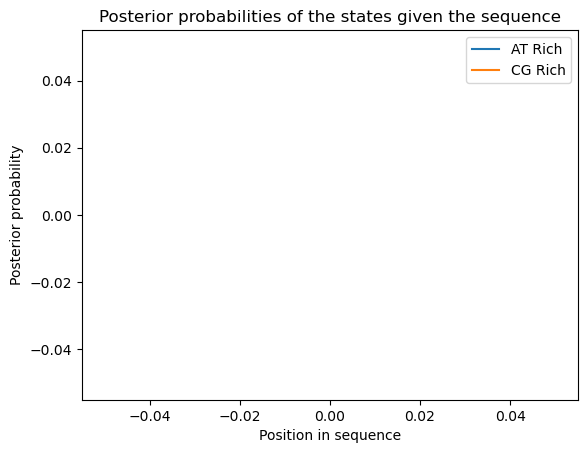

In [25]:
# Importing necessary libraries for matrix operations
import numpy as np

# Defining the states of the HMM
states = ['AT Rich', 'CG Rich']

# Defining the start probabilities
start_probability = {'AT Rich': 0.5, 'CG Rich': 0.5}

# Defining the transition probabilities
transition_probability = {
   'AT Rich': {'AT Rich': 0.9997, 'CG Rich': 0.0003},
   'CG Rich': {'AT Rich': 0.0002, 'CG Rich': 0.9998},
}

# Defining the emission probabilities
emission_probability = {
   'AT Rich': {'A': 0.2698, 'T': 0.3297, 'C': 0.2080, 'G': 0.1985},
   'CG Rich': {'A': 0.2459, 'T': 0.2079, 'C': 0.2478, 'G': 0.2984},
}

# The Forward-Backward algorithm to compute the posterior probabilities for each state given the sequence
def forward_backward(emissions, states, start_prob, trans_prob, emm_prob):
    # Number of time steps
    T = len(emissions)
    # Number of states
    N = len(states)

    # Initialize forward and backward matrices
    forward = np.zeros((N, T))
    backward = np.zeros((N, T))

    # Initialize forward matrix at time 0
    for state in range(N):
        forward[state][0] = start_prob[states[state]] * emm_prob[states[state]][emissions[0]]

    # Compute forward probabilities
    for time in range(1, T):
        for state in range(N):
            forward[state][time] = sum(forward[prev_state][time - 1] *
                                       trans_prob[states[prev_state]][states[state]] *
                                       emm_prob[states[state]][emissions[time]]
                                       for prev_state in range(N))

    # Initialize backward matrix at time T-1
    for state in range(N):
        backward[state][T - 1] = 1

    # Compute backward probabilities
    for time in range(T - 2, -1, -1):
        for state in range(N):
            backward[state][time] = sum(backward[next_state][time + 1] *
                                        trans_prob[states[state]][states[next_state]] *
                                        emm_prob[states[next_state]][emissions[time + 1]]
                                        for next_state in range(N))

    # Compute posterior probabilities
    posterior = np.zeros((N, T))
    for time in range(T):
        for state in range(N):
            posterior[state][time] = forward[state][time] * backward[state][time] / \
                                     sum(forward[s][time] * backward[s][time] for s in range(N))

    return posterior

# Example sequence (to be replaced by actual DNA sequence)
sequence = observed_sequence

# Call forward_backward algorithm
posterior_probabilities = forward_backward(sequence, states, start_probability, transition_probability, emission_probability)

# Once the posterior probabilities are computed, we can plot them using Matplotlib
import matplotlib.pyplot as plt

plt.plot(posterior_probabilities[0], label='AT Rich')
plt.plot(posterior_probabilities[1], label='CG Rich')
plt.legend()
plt.title('Posterior probabilities of the states given the sequence')
plt.xlabel('Position in sequence')
plt.ylabel('Posterior probability')

plt.show()# Note: The above calls to the forward_backward function and plotting are commented out to prevent execution at this stage.
# Once the user provides the actual sequence and any other required information, these lines can be uncommented and executed.
